<a href="https://colab.research.google.com/github/rickmai99/ALY6000/blob/main/Rick_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Abstract 

The data set contains 41,188 observations of 21 banking customers’ information variables.
After reviewing each attribute closely and providing a summary of the chosen dataset, I
concluded with four intriguing hypotheses regarding banking loaning activities:

1. Customers who currently study at basic education would borrow more than others in form of a student loan to go into university. 
2. Customers who own a house would borrow more to pay a mortgage than those who rent outside. 
3. Customers with low-paid jobs would likely to loan much more than those with high-paid jobs to pay for their increasing living expenses. 
4. Consumer Price Index and Consumer Confidence Index are closely related and are indicators for changes in loaning activities. 



In [ ]:
df <- read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/bankmarketing.csv')

# Installing packages
#install.packages("grid")
#install.packages("vcd")
#install.packages("plotrix")

# Calling libraries
library(grid)
library(vcd)

#Cleaning dataset
newdf <- data.frame(df$loan, df$housing, df$default,
                    df$age, df$job, df$marital,
                    df$education, df$cons.conf.idx,
                    df$cons.price.idx, df$nr.employed,
                    df$month, df$euribor3m,
                    df$day_of_week, df$duration, df$contact)
colnames(newdf) <- c("loan", "housing", "default",
                     "age", "job", "marital",
                     "education", "CPI",
                     "CCI", "years_of_emmployment",
                     "month", "eurobankrate",
                     "day_of_week","duration",
                     "contact")
newdf <- newdf[newdf$loan != "unknown"
               & newdf$housing != "unknown"
               & newdf$default != "unknown"
               & newdf$job != "unknown"
               & newdf$marital != "unknown"
               & newdf$education != "unknown"
               & newdf$contact != "unknown",]

newdf$loan_code <- ifelse(newdf$loan == "yes", 1, 0)
newdf$years_of_emmployment <- newdf$years_of_emmployment/365

cleandf <- subset(newdf,newdf$age < quantile(newdf$age, 0.975)
                  & newdf$CPI < quantile(newdf$CPI, 0.975))
                  

ERROR: ignored

# Task 2: Key findings

After having clean data set, I am slicing down the data by comparing the loaning activities based on education, job types, and accommodation. I have created three pie charts showing customers loaning percentage when they have a good education, high-paid jobs,
and houses and when they have low education, low-paid jobs, and no accommodation. The results are fascinating when we find a 3-5 percent difference between these data groups. Compared to before cleaning the data set, the percentage difference is 2-4, one percentage smaller than after cleaning.


1. Undoubtedly, lower level of education customers will likely loan more because they want to pay for their future university tuition, indicating that the first hypothesis might be true.

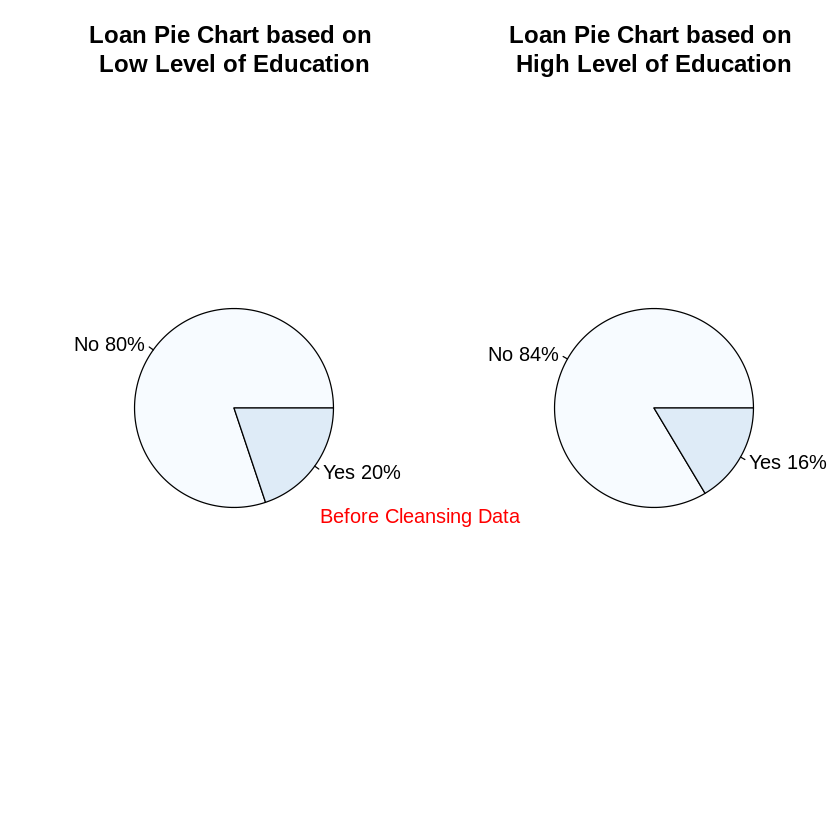

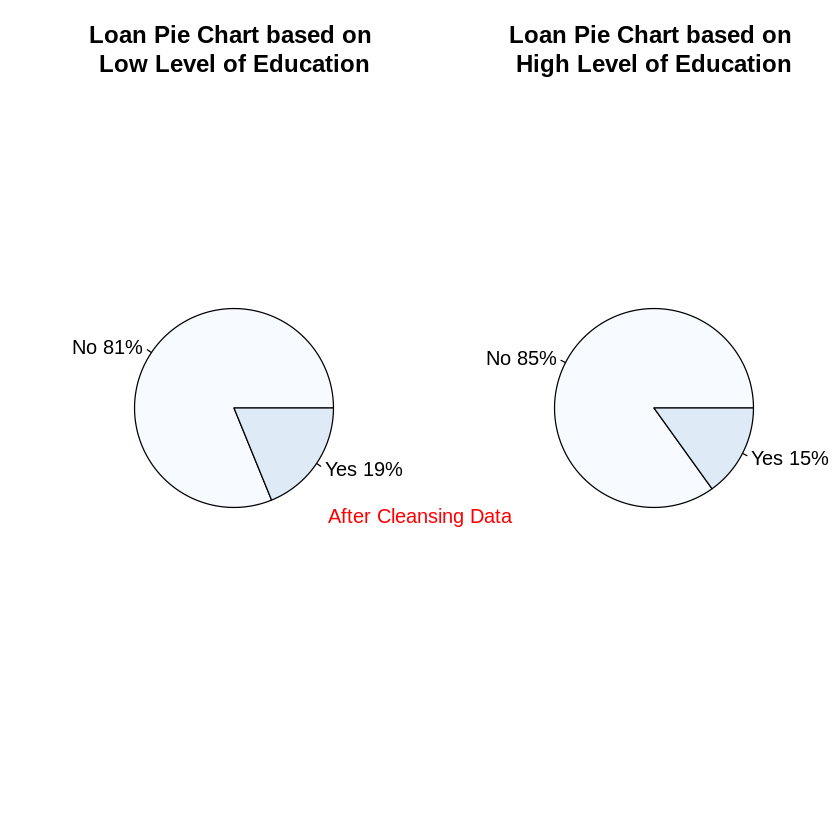

In [ ]:
# Before cleaning
newdf_edu1 <- newdf[newdf$age < 30
                   &newdf$education == c("basic.4y","basic.6y"),]

newdf_edu2 <- newdf[newdf$age < 30
                    &newdf$education == c("university.degree","professional.course"),]

opar <- par(mfrow=c(1,2))

x <- c(sum(newdf_edu1$loan_code == 0), sum(newdf_edu1$loan_code == 1))
label <- c("No","Yes")
pct <- round(x/sum(x)*100)
label <- paste(label, pct)
label <- paste(label,"%",sep = "")
pie(x, labels = label, col = blues9,
      main="Loan Pie Chart based on \nLow Level of Education")

x0 <- c(sum(newdf_edu2$loan_code == 0), sum(newdf_edu2$loan_code == 1))
label0 <- c("No","Yes")
pct0 <- round(x0/sum(x0)*100)
label0 <- paste(label0, pct0)
label0 <- paste(label0,"%",sep = "")
pie(x0, labels = label0, col = blues9,
      main="Loan Pie Chart based on \nHigh Level of Education")
mtext("Before Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar)

# After cleaning
opar4 <- par(mfrow=c(1,2))

cleandf_edu1 <- cleandf[cleandf$age < 30
                        &cleandf$education == c("basic.4y","basic.6y")
                  ,]
cx <- c(sum(cleandf_edu1$loan_code == 0), sum(cleandf_edu1$loan_code == 1))
clabel <- c("No","Yes")
cpct <- round(cx/sum(cx)*100)
clabel <- paste(clabel, cpct)
clabel <- paste(clabel,"%",sep = "")
pie(cx, labels = clabel, col = blues9,
    main = "Loan Pie Chart based on \nLow Level of Education")

cleandf_edu2 <- cleandf[cleandf$age < 30
                    &cleandf$education == c("university.degree","professional.course")
                    ,]
cx0 <- c(sum(cleandf_edu2$loan_code == 0), sum(cleandf_edu2$loan_code == 1))
clabel0 <- c("No","Yes")
cpct0 <- round(cx0/sum(cx0)*100)
clabel0 <- paste(clabel0, cpct0)
clabel0 <- paste(clabel0,"%",sep = "")
pie(cx0, labels = clabel0, col = blues9,
    main = "Loan Pie Chart based on \nHigh Level of Education")
mtext("After Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar4)

2. Similarly, lower and working-class customers (no accommodation/renting) will likely loan less than the middle and upper (own a house) because they do not have to pay a mortgage loan, implying that the second hypothesis might be true.


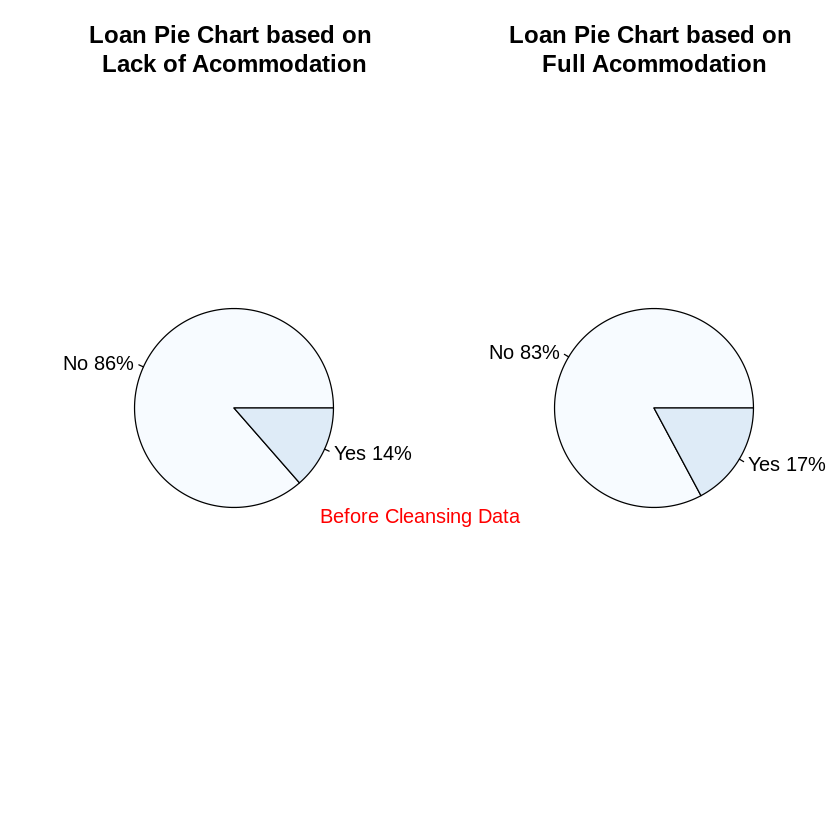

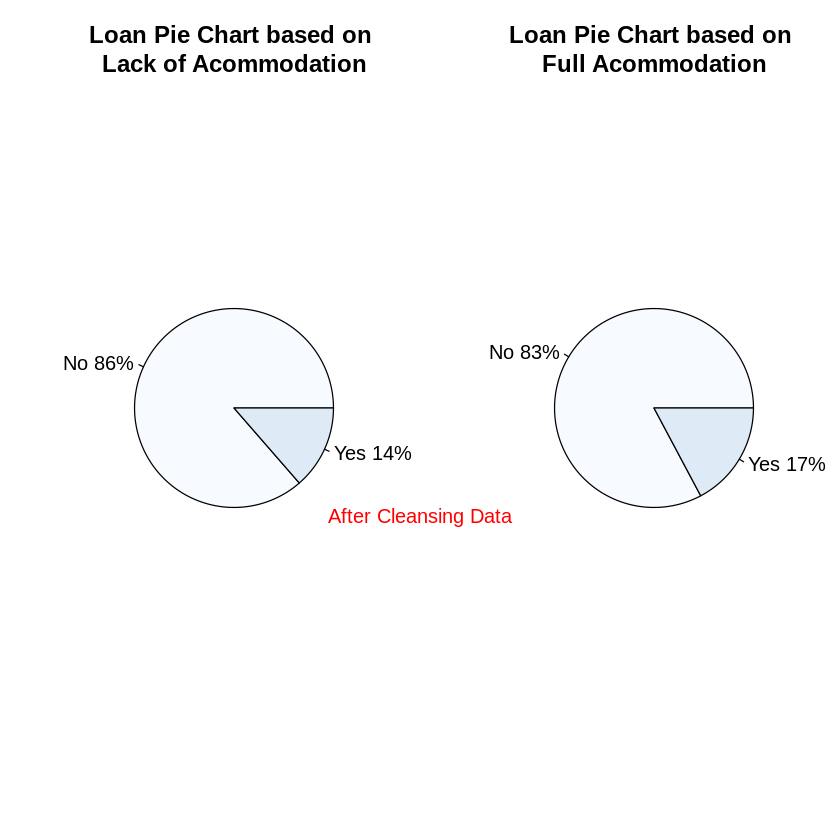

In [ ]:
# Before cleaning
opar1 <- par(mfrow=c(1,2))

newdf_house1 <- newdf[newdf$age > 30 & newdf$age < 60
                      &newdf$housing == "no",]
x1 <- c(sum(newdf_house1$loan_code == 0), sum(newdf_house1$loan_code == 1))
label1 <- c("No","Yes")
pct1 <- round(x1/sum(x1)*100)
label1 <- paste(label1, pct1)
label1 <- paste(label1,"%",sep = "")
pie(x1, labels = label1, col = blues9,
      main = "Loan Pie Chart based on \nLack of Acommodation")

newdf_house2 <- newdf[newdf$age > 30 & newdf$age < 60
                      &newdf$housing == "yes",]
x2 <- c(sum(newdf_house2$loan_code == 0), sum(newdf_house2$loan_code == 1))
label2 <- c("No","Yes")
pct2 <- round(x2/sum(x2)*100)
label2 <- paste(label2, pct2)
label2 <- paste(label2,"%",sep = "")
pie(x2, labels = label2, col = blues9,
      main = "Loan Pie Chart based on \nFull Acommodation")
mtext("Before Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar1)

# After cleaning 
opar5 <- par(mfrow=c(1,2))
cleandf_house1 <- cleandf[cleandf$age > 30 & cleandf$age < 60
                      &cleandf$housing == "no",]
cx1 <- c(sum(cleandf_house1$loan_code == 0), sum(cleandf_house1$loan_code == 1))
clabel1 <- c("No","Yes")
cpct1 <- round(cx1/sum(cx1)*100)
clabel1 <- paste(clabel1, cpct1)
clabel1 <- paste(clabel1,"%",sep = "")
pie(cx1, labels = clabel1, col = blues9,
    main = "Loan Pie Chart based on \nLack of Acommodation")

cleandf_house2 <- cleandf[cleandf$age > 30 & cleandf$age < 60
                      &cleandf$housing == "yes",]
cx2 <- c(sum(cleandf_house2$loan_code == 0), sum(cleandf_house2$loan_code == 1))
clabel2 <- c("No","Yes")
cpct2 <- round(cx2/sum(cx2)*100)
clabel2 <- paste(clabel2, cpct2)
clabel2 <- paste(clabel2,"%",sep = "")
pie(cx2, labels = clabel2, col = blues9,
    main = "Loan Pie Chart based on \nFull Acommodation")
mtext("After Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar5)

3. Surprisingly, the lower working class also has a lower loaning approval rate than the middle and upper class, which might be due to their high default rate or credibility. This information suggests that my third hypotheses is false.

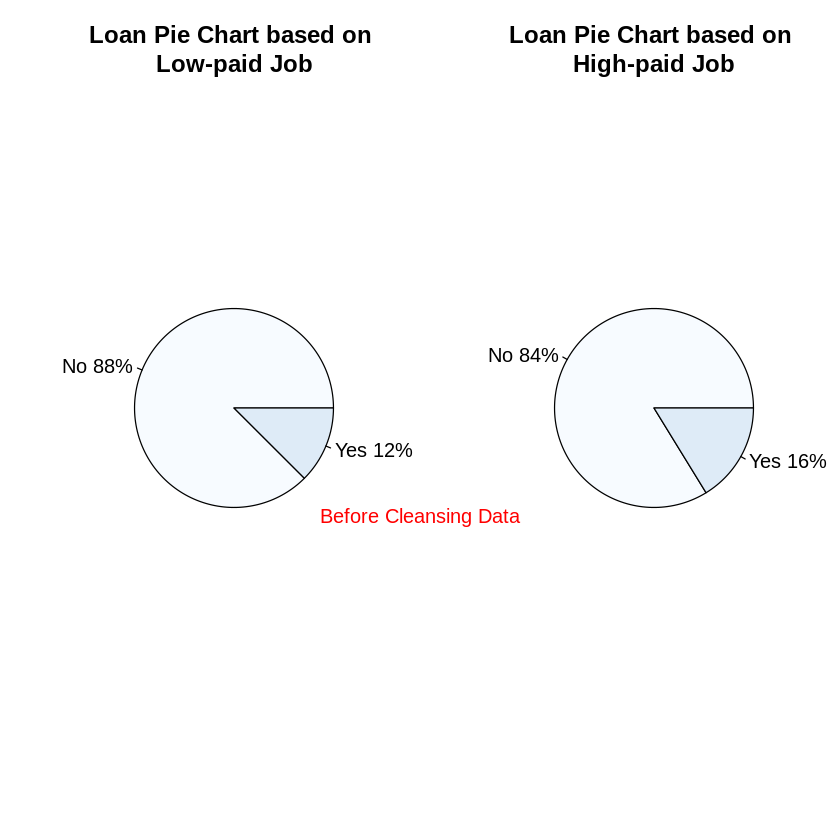

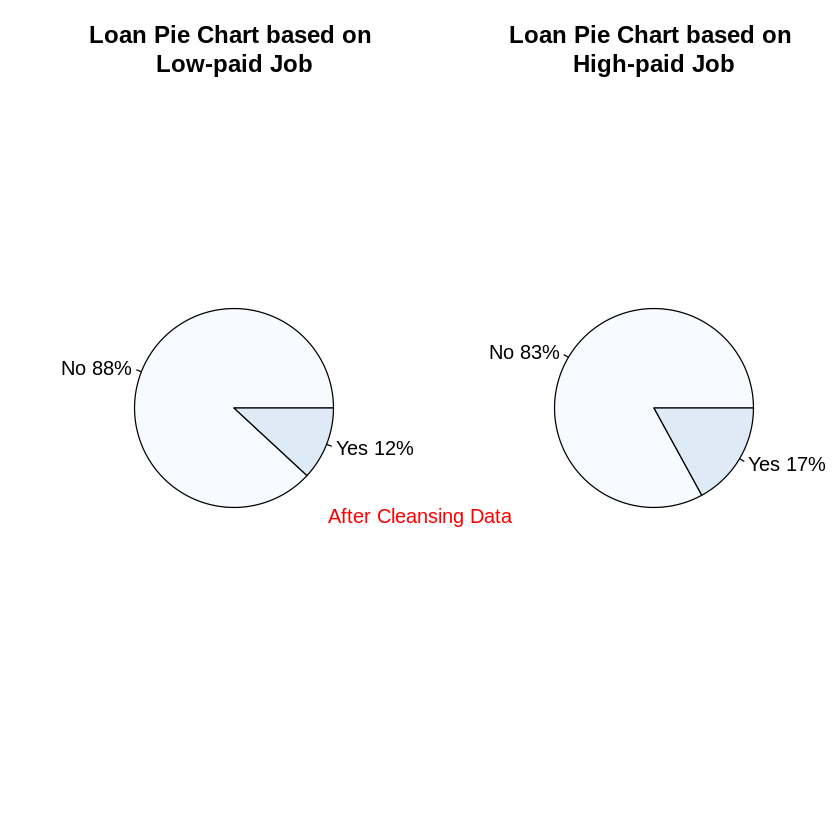

In [ ]:
# Before cleaning 
opar2 <- par(mfrow=c(1,2))

newdf_job1 <- newdf[newdf$job == c("self-employed","housemaid"),]
x3 <- c(sum(newdf_job1$loan_code == 0), sum(newdf_job1$loan_code == 1))
label3 <- c("No","Yes")
pct3 <- round(x3/sum(x3)*100)
label3 <- paste(label3, pct3)
label3 <- paste(label3,"%",sep = "")
pie(x3, labels = label3, col = blues9,
      main = "Loan Pie Chart based on \nLow-paid Job")

newdf_job2 <- newdf[newdf$job == c("blue-collar","admin."),]
x4 <- c(sum(newdf_job2$loan_code == 0), sum(newdf_job2$loan_code == 1))
label4 <- c("No","Yes")
pct4 <- round(x4/sum(x4)*100)
label4 <- paste(label4, pct4)
label4 <- paste(label4,"%",sep = "")
pie(x4, labels = label4, col = blues9,
      main = "Loan Pie Chart based on \nHigh-paid Job")
mtext("Before Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar2)

# After cleaning 
opar6 <- par(mfrow=c(1,2))
cleandf_job1 <- cleandf[cleandf$job == c("self-employed","housemaid"),]
cx3 <- c(sum(cleandf_job1$loan_code == 0), sum(cleandf_job1$loan_code == 1))
clabel3 <- c("No","Yes")
cpct3 <- round(cx3/sum(cx3)*100)
clabel3 <- paste(clabel3, cpct3)
clabel3 <- paste(clabel3,"%",sep = "")
pie(cx3, labels = clabel3, col = blues9,
    main = "Loan Pie Chart based on \nLow-paid Job")

cleandf_job2 <- cleandf[cleandf$job == c("blue-collar","admin."),]
cx4 <- c(sum(cleandf_job2$loan_code == 0), sum(cleandf_job2$loan_code == 1))
clabel4 <- c("No","Yes")
cpct4 <- round(cx4/sum(cx4)*100)
clabel4 <- paste(clabel4, cpct4)
clabel4 <- paste(clabel4,"%",sep = "")
pie(cx4, labels = clabel4, col = blues9,
      main = "Loan Pie Chart based on \nHigh-paid Job")
mtext("After Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar6)

4. I then create a scatter plot chart to observe the correlation between the CCI and CPI levels. And I found that people who are pessimistic about the future economy will likely spend less and loan less. In contrast, optimistic customers spend more and hence loan more.

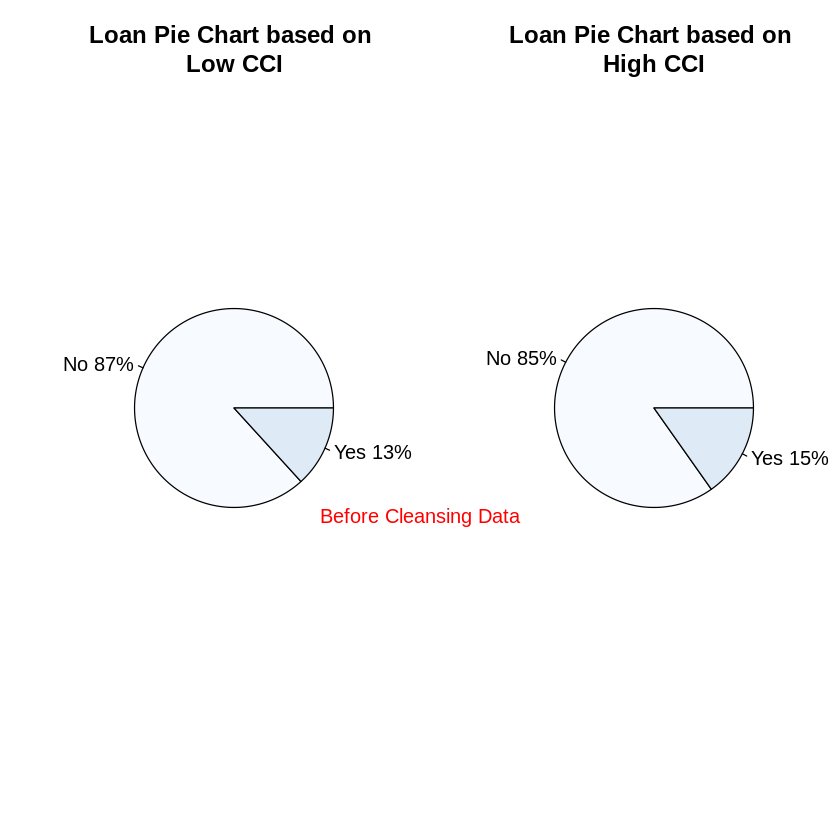

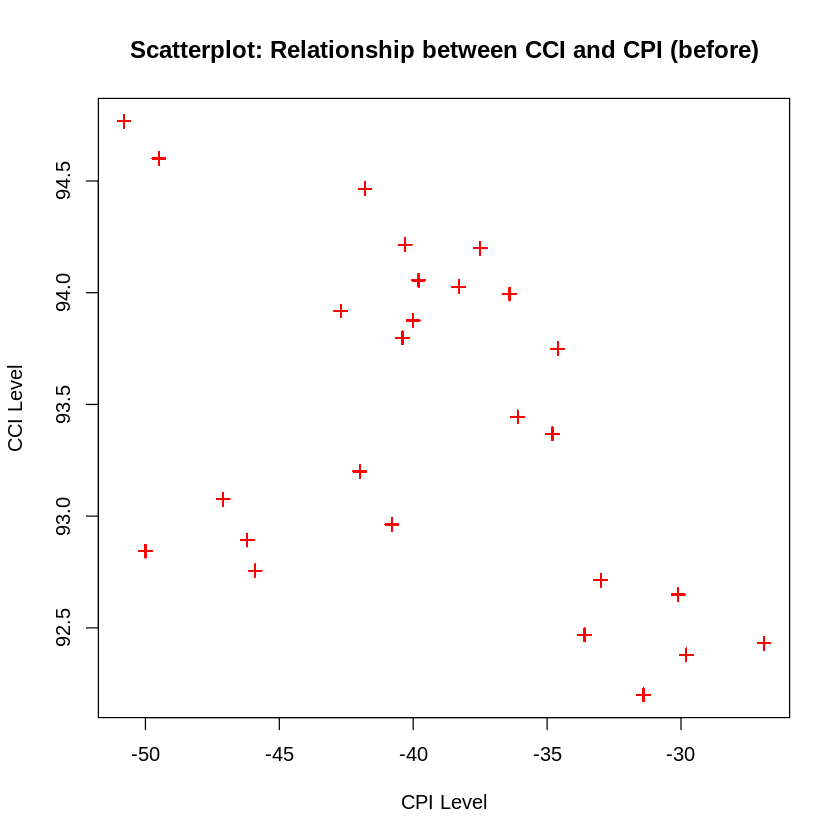

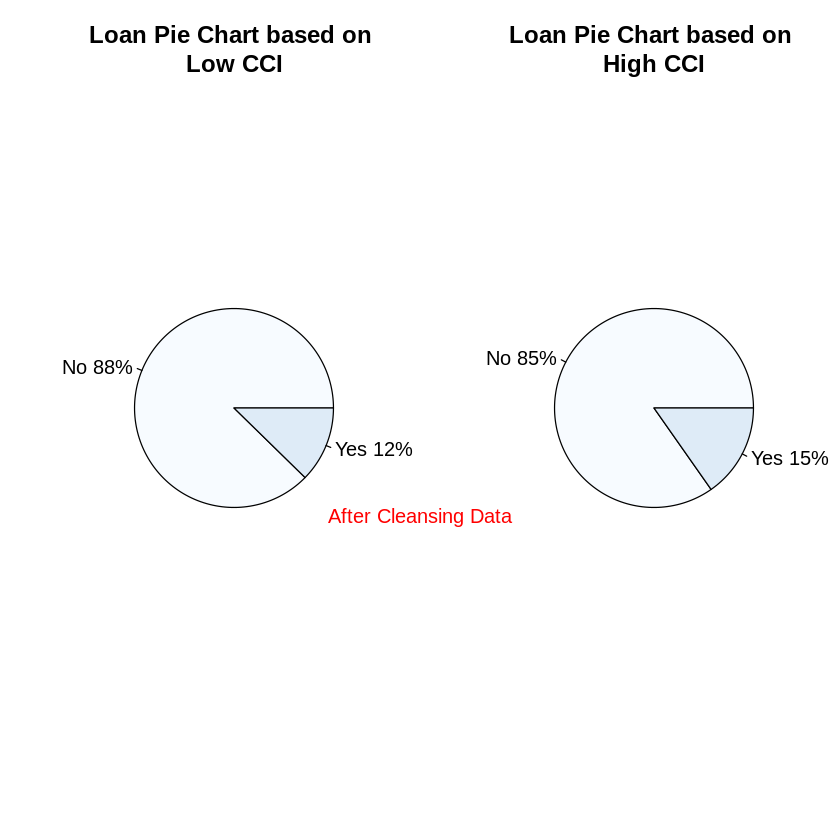

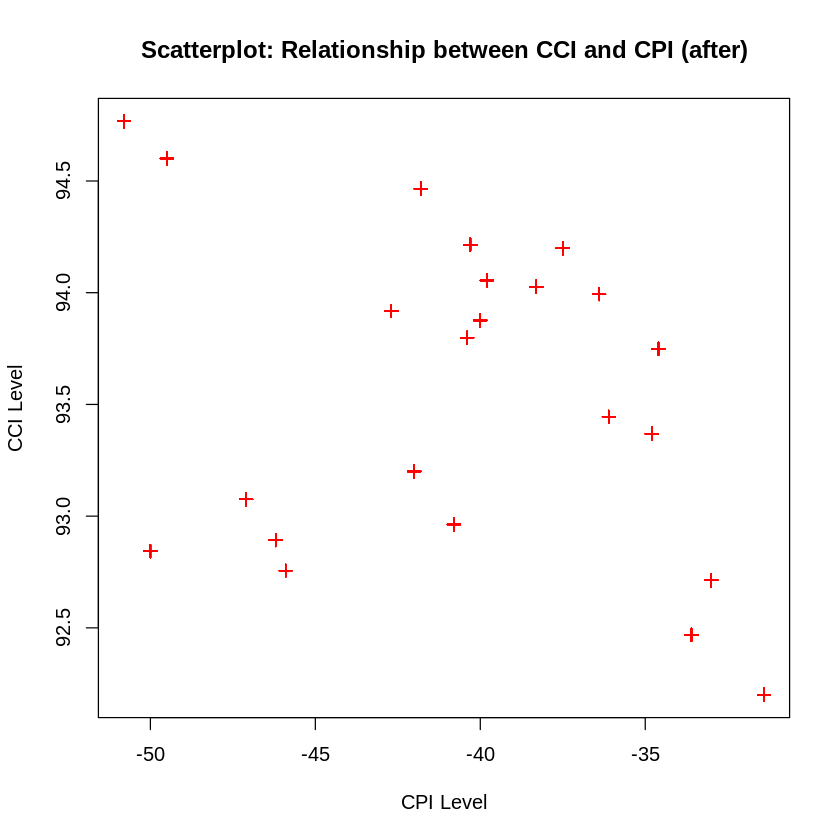

In [ ]:
# Before cleaning
opar3 <- par(mfrow=c(1,2))

newdf_default1 <- newdf[newdf$CCI < 92.5,]
x5 <- c(sum(newdf_default1$loan_code == 0), sum(newdf_default1$loan_code == 1))
label5 <- c("No","Yes")
pct5 <- round(x5/sum(x5)*100)
label5 <- paste(label5, pct5)
label5 <- paste(label5,"%",sep = "")
pie(x5, labels = label5, col = blues9,
      main = "Loan Pie Chart based on \nLow CCI")

newdf_default2 <- newdf[newdf$CCI > 94,]
x6 <- c(sum(newdf_default2$loan_code == 0), sum(newdf_default2$loan_code == 1))
label6 <- c("No","Yes")
pct6 <- round(x6/sum(x6)*100)
label6 <- paste(label6, pct6)
label6 <- paste(label6,"%",sep = "")
pie(x6, labels = label6, col = blues9,
    main = "Loan Pie Chart based on \nHigh CCI")
mtext("Before Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar3)

plot(newdf$CPI, newdf$CCI, xlab = "CPI Level", ylab = "CCI Level",
     main = "Scatterplot: Relationship between CCI and CPI (before)",
     col = "red", pch = 3)

# After cleaning
opar7 <- par(mfrow=c(1,2))

cleandf_CCI1 <- cleandf[cleandf$CCI < 92.5,]
cx5 <- c(sum(cleandf_CCI1$loan_code == 0), sum(cleandf_CCI1$loan_code == 1))
clabel5 <- c("No","Yes")
cpct5 <- round(cx5/sum(cx5)*100)
clabel5 <- paste(clabel5, cpct5)
clabel5 <- paste(clabel5,"%",sep = "")
pie(cx5, labels = clabel5, col = blues9,
    main = "Loan Pie Chart based on \nLow CCI")

cleandf_CCI2 <- cleandf[cleandf$CCI > 94,]
cx6 <- c(sum(cleandf_CCI2$loan_code == 0), sum(cleandf_CCI2$loan_code == 1))
clabel6 <- c("No","Yes")
cpct6 <- round(cx6/sum(cx6)*100)
clabel6 <- paste(clabel6, cpct6)
clabel6 <- paste(clabel6,"%",sep = "")
pie(cx6, labels = clabel6, col = blues9,
      main = "Loan Pie Chart based on \nHigh CCI")
mtext("After Cleansing Data", outer = TRUE, line =-22, col = "red")
par(opar7)

plot(cleandf$CPI, cleandf$CCI, xlab = "CPI Level", ylab = "CCI Level",
     main = "Scatterplot: Relationship between CCI and CPI (after)",
     col = "red", pch = 3)

# Task 3: Change one repetitive code block with a for-loop
(I think about maybe inflation could affect the bank loan rates. So I compute monthly
inflation rates using the CPI from each month.)

In [ ]:
inflation <- function(a,b){
  c <- ((b-a)/a)*100
} 
rate <- c(inflation(mean(cleandf$CPI[cleandf$month=="apr"]),
               mean(cleandf$CPI[cleandf$month=="aug"])),
inflation(mean(cleandf$CPI[cleandf$month=="aug"]),
               mean(cleandf$CPI[cleandf$month=="dec"])),
inflation(mean(cleandf$CPI[cleandf$month=="dec"]),
               mean(cleandf$CPI[cleandf$month=="jul"])),
inflation(mean(cleandf$CPI[cleandf$month=="jul"]),
               mean(cleandf$CPI[cleandf$month=="jun"])),
inflation(mean(cleandf$CPI[cleandf$month=="jun"]),
               mean(cleandf$CPI[cleandf$month=="mar"])),
inflation(mean(cleandf$CPI[cleandf$month=="mar"]),
               mean(cleandf$CPI[cleandf$month=="may"])),
inflation(mean(cleandf$CPI[cleandf$month=="may"]),
               mean(cleandf$CPI[cleandf$month=="nov"])),
inflation(mean(cleandf$CPI[cleandf$month=="nov"]),
               mean(cleandf$CPI[cleandf$month=="oct"])),
inflation(mean(cleandf$CPI[cleandf$month=="oct"]),
               mean(cleandf$CPI[cleandf$month=="sep"])))

for (n in rate) {
    message(sprintf("%.2f ",n), "is the inflation rate") # changed to msg
}


# Task 4: Double-checking effects of oddities
The before-effect was all the pie charts I have shown above. I assume that the after-effect will count all the unknown values in every situation, meaning that every pie chart or histogram would show another bar or another portion for unknown values. For instance, if I present a histogram for loan total with the unknowns, it would depict three bars for each month instead of two. Another change is the significant drop of ten thousand observations in the data set. Fortunately, my hypotheses do not require me to calculate the values for unknown values, as I did not aim to learn about the effects of the unknown values from the beginning.  

In [ ]:
df1 <- read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/bankmarketing.csv', na.string=c("unknown",0))
newdf1 <- data.frame(df$loan, df$housing, df$default,
                    df$age, df$job, df$marital,
                    df$education, df$cons.conf.idx,
                    df$cons.price.idx, df$nr.employed,
                    df$month, df$euribor3m,
                    df$day_of_week, df$duration, df$contact)
colnames(newdf1) <- c("loan", "housing", "default",
                     "age", "job", "marital",
                     "education", "CPI",
                     "CCI", "years_of_emmployment",
                     "month", "eurobankrate",
                     "day_of_week","duration",
                     "contact")
str(newdf1)
str(newdf)

# Example of the before and after effect 
counts1 <- table(newdf1$loan, newdf1$month)
counts1

barplot(counts1, beside = TRUE, col = c("beige","blue","red"),
        main = "Barplot: Monthly Loan Total (After)")
legend("topright", inset = .05, 
       title = "Loan Total", c("Yes","NA","No"),
       col = c("red","blue","beige"), pch = c(15))

counts2 <- table(newdf$loan, newdf$month)
counts2

barplot(counts2, beside = TRUE, col = c("beige","red"),
        main = "Barplot: Monthly Loan Total (Before)")
legend("topright", inset = .05, 
       title = "Loan Total", c("Yes","No"),
       col = c("red","beige"), pch = c(15))


# Task 5 & 6: A for-loop to automatically summarize huge datasets

In [ ]:
t1<-read.csv('https://www.dropbox.com/s/vp44yozebx5xgok/bdiag.csv?dl=1')
t2<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/train.csv')

summarize_df1 <- function( a ) 
{
  for (i in colnames( a )) {
    if (is.character(unlist(a[i]))) {
      cat(i,":", length(unique(unlist(a[i])))/2, "example values are", head(unique(unlist(a[i]))), "\n")
    } else if (is.integer(unlist(a[i]))) {
      cat(i, ":", min(unlist(a[i])), "and", max(unlist(a[i])), "are its min and max values, with", which.max(unlist(a[i])), 
      "being the most common value", "\n")
    } else if (is.double(unlist(a[i]))) {
      cat(i, ":", "its mean and interquartile range are", mean(unlist(a[i])), "and", IQR(unlist(a[i])), ", respectively", "\n")
    }
  }
} 

summarize_df1(df)
summarize_df1(t1)
summarize_df1(t2)

# I use the which.max() function instead of mode() function (Sources: Tutorialspoint)

# References 

1. Consumer Confidence Index (CCI). (September, 2022). OECD Data. https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

2. Kabacoff, R. I. (May 2015). Chapter 6: Basic graphs. R in action: Data analysis andgraphics in R (2nd ed). Manning. ISBN: 978-1-617-29138-8.

3. MISH. (February, 2022). What’s the relationship between the CPI and increases in banklending ?. Mish Talk. https://mishtalk.com/economics/whats-the-relationship-between-the-cpi-and-increases-in-bank-lending

4. Pandit, S. (September, 2022). https://www.kaggle.com/datasets/shrutipandit707/bankmarketing

5. Sarveshwar, K.I. (September, 2016). Sarveshwar Inani’s blog.
http://learningeconometrics.blogspot.com/2016/09/four-moments-of-distribution-mean.html

6. Turney, S. (June, 2022). What is Kurtosis? Definition, examples & formula. Scribbr. https://www.scribbr.com/statistics/kurtosis/

7. Tutorialspoint. How to find the most frequent factor value in an R dataframe column. https://www.tutorialspoint.com/how-to-find-the-most-frequent-factor-value-in-an-r-data-frame-column#:~:text=More%20Detail-,To%20find%20the%20most%20frequent%20factor%20value%20in%20an%20R,which%20factor%20occurs%20the%20most.
